# Project One - Webscraping 
## Descriptive Analytics of AI Startups in Drug Discovery

- In what therapeutic area are they mostly in? 
- Have more AI startups been founded in recent years/has it peaked already? 
- What indication are they treating? 
- What stage are they in?

### Table of Contents

* [Dataset 1 - Drugs using AI](#dataset_1)
* [Dataset 2 - startups using AI](#dataset_2)
* [Exploring the Datasets](#explo)
    * [Dataset 1](#dataset1)
    * [Dataset 2](#dataset2)
* [Merging](#merged)
* [Top Countries](#top_countries)
    * [Graph](#graph)
    * [Boxplot](#boxplot)
* [Exploring Therapeutic Area](#ta)
* [World Cloud](#wc)

In [2]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [3]:
#so all DataFrame data is displayed
pd.set_option('display.max_columns',None)
pd.set_option('display.min_rows',0)
pd.set_option('display.max_rows',100)

### Dataset 1: Drugs in the AI in Drug Discovery Pipeline Dataset <a class="anchor" id="dataset_1"></a>
- data scraped from https://blog.benchsci.com/drugs-in-the-artificial-intelligence-in-drug-discovery-pipeline

In [4]:
aidd_df=pd.read_csv('aidd.csv')
aidd_df.head() #inspect first 5 rows

,company,drug,indication,stage,therapeutic_area
0,Company,Drug,Indication,NaN,Therapeutic area
1,Acurastem,AS - 1,Amyotrophic lateral sclerosis and frontotempor...,Phase 3,Neurology
2,Pharnext,PXT3003,Charcot-Marie-Tooth disease type 1A adults,Phase 3,Neurology
3,Sunovion,SEP-363856,Schizophrenia,Phase 3,Neurology
4,AI Therapeutics,LAM–002,B-cell non-Hodgkin lymphoma (atezolizumab comb...,Phase 2,Oncology


- Needed to drop first index since it was duplicated in the CVS file
- Drop function is nonmutating so I assigned it to a new DataFrame  

In [5]:
aidd_df2 = aidd_df.drop(aidd_df.index[[0]]).reset_index(drop=True) #drop = True so old index doesn't become a new column
print(aidd_df2.shape) #checking the shape of df - 262 drugs
aidd_df2.head()
aidd_df2.drug.describe()

(262, 5)


count             262
unique            117
top       Undisclosed
freq              115
Name: drug, dtype: object

### Dataset 2: 230 Startups Using AI in Drug Discovery <a class="anchor" id="dataset_2"></a>
- data scraped from https://blog.benchsci.com/startups-using-artificial-intelligence-in-drug-discovery

In [6]:
ais_df = pd.read_csv('aistartups.csv')
print(ais_df.shape) #checking the shape of df - 230 companies
ais_df.head()

(230, 5)


,company,founded,headquarters,purpose,use
0,3BIGS,2017,"Suwon, Ch'ungch'ong-namdo, South Korea",Repurpose drugs for new indications,"Discover relationships between diseases, targe..."
1,Amplion,2013,"Bend, Oregon, United States","Ensure an effective mix of biomarkers, establi...",Synthesize biomedical knowledge and biomarker ...
2,BioSymetrics,2015,"New York, New York, United States",Integrate rapid analytics and machine learning...,"Process raw phenotypic, imaging, drug, and gen..."
3,Biorelate,2014,"Oldham, Oldham, United Kingdom",Extract structured biological knowledge to pow...,Create curated databases from the analysis of ...
4,Causaly,2017,"London, England, United Kingdom",Search for cause and effect relationships and ...,Read scientific articles and extract causal as...


### Exploring the Datasets <a class="anchor" id="explo"></a>
#### Exploring Dataset 1: Drugs in the AI in Drug Discovery Pipeline Dataset <a class="anchor" id="dataset1"></a>


In [7]:
aidd_df2.columns.tolist()

['company', 'drug', 'indication', 'stage', 'therapeutic_area']

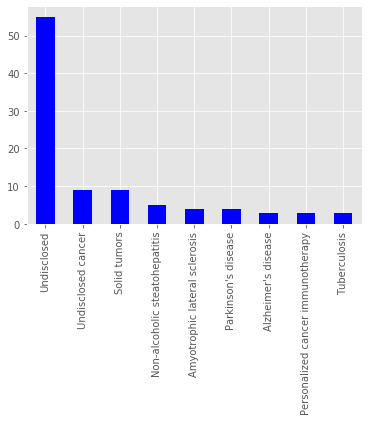

In [8]:
#Looking at the most stated indication
ind_fig = aidd_df2.groupby('indication').filter(lambda x: x.shape[0] > 2)

ind_fig['indication'].value_counts().plot(kind='bar',y='count', color='b')



In [9]:
aidd_df2['therapeutic_area'].value_counts()

Oncology                       108
Neurology                       43
Infectious disease              27
Rare disease                    19
Undisclosed                     15
Metabolic disease               14
Inflammation and immunology     11
Cardiology                       7
Fibrosis                         6
Dermatology                      5
Gastroenterology                 2
Ophthalmology                    2
Respiratory                      1
Hematology                       1
Biogerontology                   1
Name: therapeutic_area, dtype: int64

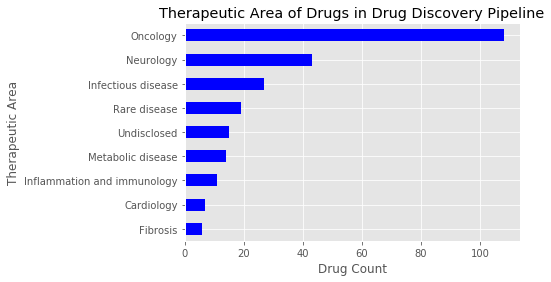

In [10]:
#Looking at the spread of therapeutic area for the drugs
ta_fig = aidd_df2.groupby('therapeutic_area').filter(lambda x: x.shape[0] > 5)
ta_fig['therapeutic_area'].value_counts().sort_values(ascending=True).plot(kind='barh',y='count', color='b')
plt.title('Therapeutic Area of Drugs in Drug Discovery Pipeline')
plt.xlabel('Drug Count')
plt.ylabel('Therapeutic Area')
        
plt.show()

In [11]:
aidd_df2['therapeutic_area'].value_counts()

Oncology                       108
Neurology                       43
Infectious disease              27
Rare disease                    19
Undisclosed                     15
Metabolic disease               14
Inflammation and immunology     11
Cardiology                       7
Fibrosis                         6
Dermatology                      5
Gastroenterology                 2
Ophthalmology                    2
Respiratory                      1
Hematology                       1
Biogerontology                   1
Name: therapeutic_area, dtype: int64

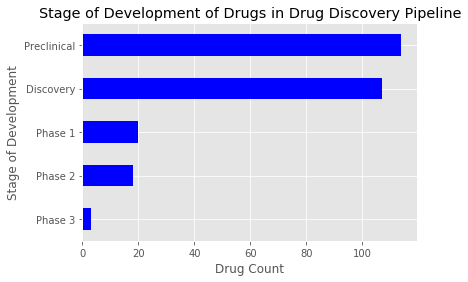

In [12]:
#Looking at the spread of stage of development for the drugs
aidd_df2['stage'].value_counts().sort_values(ascending=True).plot(kind='barh',y='count', color='b')
plt.title('Stage of Development of Drugs in Drug Discovery Pipeline')
plt.xlabel('Drug Count')
plt.ylabel('Stage of Development')
plt.show()

In [13]:
aidd_df2['stage'].value_counts()

Preclinical    114
Discovery      107
Phase 1         20
Phase 2         18
Phase 3          3
Name: stage, dtype: int64

In [14]:
aidd_df2['stage'].describe()

count             262
unique              5
top       Preclinical
freq              114
Name: stage, dtype: object

In [15]:
114/262

0.4351145038167939

### Exploring Dataset 2: 230 Startups Using AI in Drug Discovery <a class="anchor" id="dataset2"></a>

In [16]:
ais_df.columns.tolist()

['company', 'founded', 'headquarters', 'purpose', 'use']

In [17]:
ais_df.head()

,company,founded,headquarters,purpose,use
0,3BIGS,2017,"Suwon, Ch'ungch'ong-namdo, South Korea",Repurpose drugs for new indications,"Discover relationships between diseases, targe..."
1,Amplion,2013,"Bend, Oregon, United States","Ensure an effective mix of biomarkers, establi...",Synthesize biomedical knowledge and biomarker ...
2,BioSymetrics,2015,"New York, New York, United States",Integrate rapid analytics and machine learning...,"Process raw phenotypic, imaging, drug, and gen..."
3,Biorelate,2014,"Oldham, Oldham, United Kingdom",Extract structured biological knowledge to pow...,Create curated databases from the analysis of ...
4,Causaly,2017,"London, England, United Kingdom",Search for cause and effect relationships and ...,Read scientific articles and extract causal as...


#### Decided to separate out headquarters to City, State, Country to analyze the data by country

In [20]:
type(ais_df.head()['headquarters'][0])

str

In [21]:
ais_df.head()['headquarters'][0]

"Suwon, Ch'ungch'ong-namdo, South Korea"

In [22]:
ais_df[['City',"State",'Country']] = ais_df['headquarters'].str.split(", ",expand=True) 

ais_df.head()

,company,founded,headquarters,purpose,use,City,State,Country
0,3BIGS,2017,"Suwon, Ch'ungch'ong-namdo, South Korea",Repurpose drugs for new indications,"Discover relationships between diseases, targe...",Suwon,Ch'ungch'ong-namdo,South Korea
1,Amplion,2013,"Bend, Oregon, United States","Ensure an effective mix of biomarkers, establi...",Synthesize biomedical knowledge and biomarker ...,Bend,Oregon,United States
2,BioSymetrics,2015,"New York, New York, United States",Integrate rapid analytics and machine learning...,"Process raw phenotypic, imaging, drug, and gen...",New York,New York,United States
3,Biorelate,2014,"Oldham, Oldham, United Kingdom",Extract structured biological knowledge to pow...,Create curated databases from the analysis of ...,Oldham,Oldham,United Kingdom
4,Causaly,2017,"London, England, United Kingdom",Search for cause and effect relationships and ...,Read scientific articles and extract causal as...,London,England,United Kingdom


### Merged Datesets to create Merged DataFrame <a class="anchor" id="merged"></a> 
- There are 35 unique companies in the Drug dataset 
- I combined it with the startup dataset 2 (230 companies) so we would know more about the companies in the drug dataset 1
- 34 companies were shared between the datasets

In [23]:
len(ais_df.company.unique())

230

In [24]:
len(aidd_df2.company.unique())

35

In [25]:
#Merged to find more info on drugs 
merged_df = pd.merge(ais_df, aidd_df2, on = 'company')
merged_df.shape[0]

261

In [26]:
len(merged_df.company.unique()) #34 unique companies 

34

In [27]:
merged_df.head(5) 

,company,founded,headquarters,purpose,use,City,State,Country,drug,indication,stage,therapeutic_area
0,Acurastem,2016,"Monrovia, California, United States","Discover drugs for neurodenerative diseases, i...",Analyze data from sources including patient st...,Monrovia,California,United States,AS - 1,Amyotrophic lateral sclerosis and frontotempor...,Phase 3,Neurology
1,Acurastem,2016,"Monrovia, California, United States","Discover drugs for neurodenerative diseases, i...",Analyze data from sources including patient st...,Monrovia,California,United States,AS - 3,Amyotrophic lateral sclerosis,Discovery,Neurology
2,Acurastem,2016,"Monrovia, California, United States","Discover drugs for neurodenerative diseases, i...",Analyze data from sources including patient st...,Monrovia,California,United States,AS - 2,Amyotrophic lateral sclerosis,Discovery,Neurology
3,Acurastem,2016,"Monrovia, California, United States","Discover drugs for neurodenerative diseases, i...",Analyze data from sources including patient st...,Monrovia,California,United States,AS - 1,Neurodegenerative diseases,Discovery,Neurology
4,Acurastem,2016,"Monrovia, California, United States","Discover drugs for neurodenerative diseases, i...",Analyze data from sources including patient st...,Monrovia,California,United States,AS - 1,Anti-viral,Discovery,Infectious disease


In [28]:
merged_df['City'].isnull().values.sum()

0

In [29]:
aidd_df2.company.unique()

array(['Acurastem', 'Pharnext', 'Sunovion', 'AI Therapeutics', 'Berg',
       'BioXcel Therapeutics', 'BlackThorn Therapeutics', 'Globavir',
       'Lantern Pharma', 'SOM Biotech', 'Adagene',
       'Cotinga Pharmaceuticals', 'Evaxion Biotech', 'Exscientia',
       'Gritstone Oncology', 'Pharos iBT', 'Recursion Pharmaceuticals',
       'Vaxine', 'Alphanosos', 'Auransa', 'Biovista', 'CaroCure',
       'Cloud Pharmaceuticals', 'Collaborations Pharma', 'Coral Genomics',
       'Deep Genomics', 'Healx', 'Neon Therapeutics', 'Reverie Labs',
       'Standigm', 'TwoXAR', 'A2A Pharmaceuticals', 'Schrödinger',
       'Sirenas', 'X-37'], dtype=object)

In [30]:
merged_df.company.unique()

array(['Acurastem', 'BioXcel Therapeutics', 'Biovista', 'Healx',
       'Lantern Pharma', 'Pharnext', 'Recursion Pharmaceuticals',
       'A2A Pharmaceuticals', 'AI Therapeutics', 'Adagene', 'Alphanosos',
       'Auransa', 'Berg', 'BlackThorn Therapeutics', 'CaroCure',
       'Cloud Pharmaceuticals', 'Collaborations Pharma',
       'Cotinga Pharmaceuticals', 'Deep Genomics', 'Evaxion Biotech',
       'Exscientia', 'Globavir', 'Gritstone Oncology',
       'Neon Therapeutics', 'Pharos iBT', 'SOM Biotech', 'Sirenas',
       'Standigm', 'TwoXAR', 'Vaxine', 'X-37', 'Coral Genomics',
       'Reverie Labs', 'Schrödinger'], dtype=object)

In [31]:
aidd_df2.columns.tolist()

['company', 'drug', 'indication', 'stage', 'therapeutic_area']

In [32]:
ais_df.columns.tolist()

['company',
 'founded',
 'headquarters',
 'purpose',
 'use',
 'City',
 'State',
 'Country']

In [33]:
merged_df.columns.tolist()

['company',
 'founded',
 'headquarters',
 'purpose',
 'use',
 'City',
 'State',
 'Country',
 'drug',
 'indication',
 'stage',
 'therapeutic_area']

In [34]:
aidd_df2.head()['indication'][1] #unique to each drug - good use for NLP

'Charcot-Marie-Tooth disease type 1A adults'

In [35]:
ais_df.head()['purpose'][1] #unique to each company - good use for NLP

'Ensure an effective mix of biomarkers, establish differentiation, recruit the right patients, and identify the best companion diagnostic opportunities'

### Exploring countries in Dataset 2 with most startups <a class="anchor" id="top_countries"></a>

In [74]:
pd.DataFrame(ais_df['Country'].value_counts()).head()

,Country
United States,126
United Kingdom,26
Canada,16
France,15
China,7


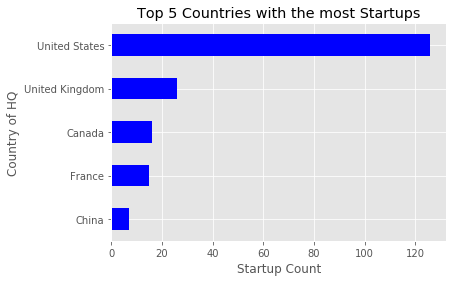

In [37]:
#Filtering for top 5 countries with startups 
ais_dfig = ais_df.groupby('Country').filter(lambda x: x.shape[0] > 6)
ais_dfig['Country'].value_counts().sort_values(ascending=True).plot(kind='barh',y='count', color='b')
plt.title('Top 5 Countries with the most Startups')
plt.xlabel('Startup Count')
plt.ylabel('Country of HQ')
plt.show()

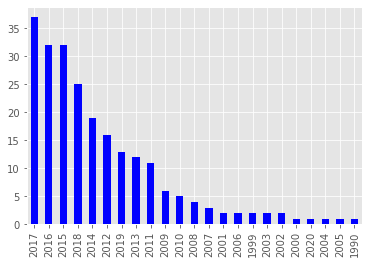

In [38]:
#Bar graph of number of companies founded each year
ais_df['founded'].value_counts().plot(kind='bar',y='count', color='b')

In [39]:
# Created new DataFrame for top 5 countries sorted by year of founding
cf = pd.DataFrame(ais_dfig.groupby('Country')['founded'].value_counts())
cf.head()

founded
Country founded         
Canada  2015           4
        2017           3
        2018           2
        2019           2
        2010           1

#### Question: How many startsup where founded in each top 5 countries each year 


(126, 8)


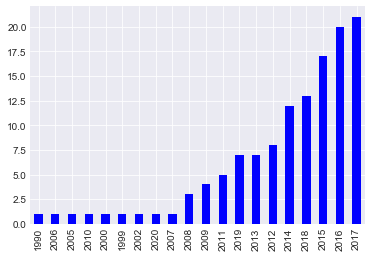

In [75]:
#closer look at US data
is_USA = ais_df['Country']=='United States'
ais_us = ais_df[is_USA]
print(ais_us.shape)
# ais_us.head()
ais_us.founded.value_counts().sort_values(ascending=True).plot(kind='bar', color='b')
# ais_us.founded.value_counts()

(15, 8)


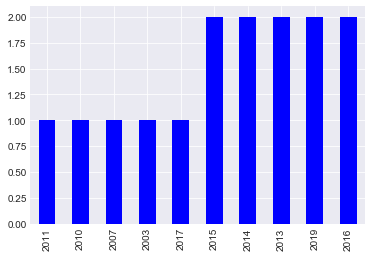

In [76]:
#closer look at France data
is_FR = ais_df['Country']=='France'
ais_FR = ais_df[is_FR]
print(ais_FR.shape)
ais_FR.head()
ais_FR.founded.value_counts().sort_values(ascending=True).plot(kind='bar', color='b')

In [43]:
#value counts
ais_dfig['Country'].value_counts()

United States     126
United Kingdom     26
Canada             16
France             15
China               7
Name: Country, dtype: int64

### Graph of startups founded by year separated in each top 5 countries <a class="anchor" id="graph"></a>

In [44]:
countries = ['United States', 'United Kingdom', 'Canada', 'France', 'China']
filtered_df= ais_df[ais_df.Country.isin(countries)==True]
df = filtered_df.groupby(['founded', 'Country']).size().reset_index()
df = df.pivot(index='founded', columns='Country', values = 0)

In [45]:
df05 = df[df.index >= 2005]

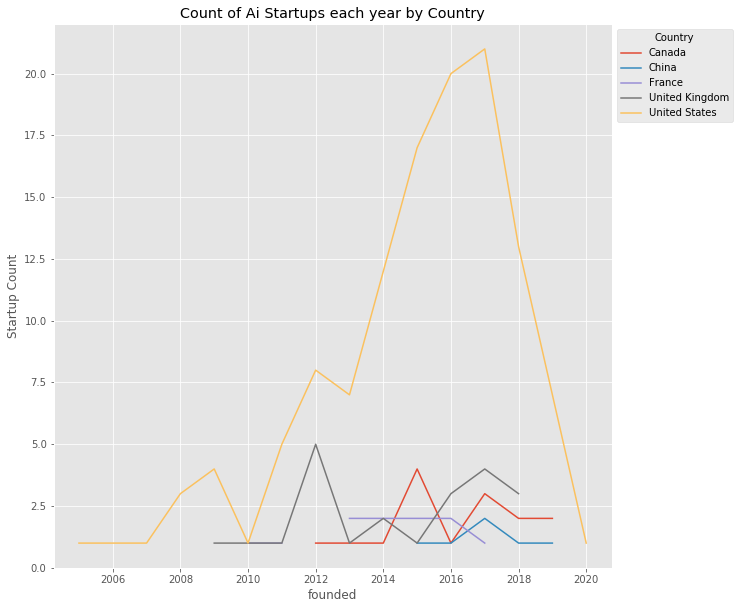

In [46]:
df05.plot(figsize = (10,10)).legend(title='Country', bbox_to_anchor=(1, 1))
plt.title('Count of Ai Startups each year by Country')
plt.ylabel('Startup Count')
plt.rcParams.update({'font.size': 10})

In [47]:
is_UK = ais_df['Country']=='United Kingdom'
ais_UK = ais_df[is_UK]
is_Canada = ais_df['Country']=='Canada'
ais_Canada = ais_df[is_Canada]
is_China = ais_df['Country']=='China'
ais_China = ais_df[is_China]

In [48]:
#new DataFrame of number of startups founded in each country indexed by year
new_df=pd.DataFrame({'USA': ais_us.founded.value_counts(),'United Kingdom':ais_UK.founded.value_counts(), \
                     'Canada': ais_Canada.founded.value_counts(),'France': ais_FR.founded.value_counts(),'China': ais_China.founded.value_counts()})

In [49]:
#Add Year as index
new_df=pd.DataFrame({'Year': new_df.index, 'USA': ais_us.founded.value_counts(),'United Kingdom':ais_UK.founded.value_counts(), \
                     'Canada': ais_Canada.founded.value_counts(),'France': ais_FR.founded.value_counts(),'China': ais_China.founded.value_counts()})
new_df

,Year,USA,United Kingdom,Canada,France,China
1990,1990,1.0,NaN,NaN,NaN,NaN
1999,1999,1.0,1.0,NaN,NaN,NaN
2000,2000,1.0,NaN,NaN,NaN,NaN
2001,2001,NaN,1.0,NaN,NaN,NaN
2002,2002,1.0,NaN,NaN,NaN,NaN
2003,2003,NaN,1.0,NaN,1.0,NaN
2005,2005,1.0,NaN,NaN,NaN,NaN
2006,2006,1.0,1.0,NaN,NaN,NaN
2007,2007,1.0,NaN,NaN,1.0,NaN
2008,2008,3.0,NaN,NaN,NaN,NaN


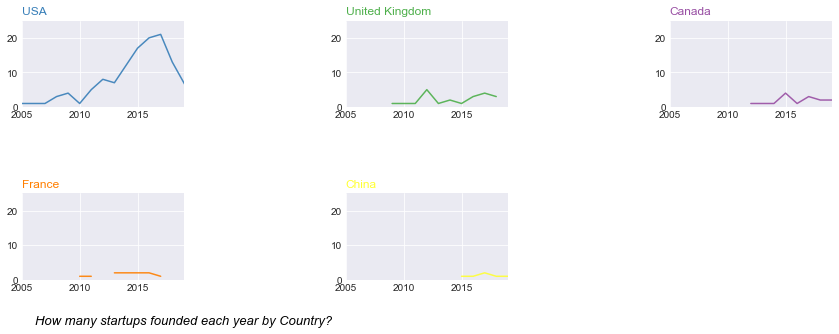

In [50]:
#Found this was to have side by side graphs of the above data
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in new_df.drop('Year', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(3,3, num)
    plt.subplots_adjust(left=None, bottom=.5, right=2, top=2, wspace=1, hspace=1)

    
    # Plot the lineplot
    plt.plot(new_df['Year'], new_df[column], marker='', color=palette(num), alpha=0.9, label=column)
 
    # Same limits for everybody!
    plt.xlim(2005,2019)
    plt.ylim(0,25)
 
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
    # general title
    plt.suptitle("How many startups founded each year by Country?", fontsize=13, fontweight=0, color='black', style='italic')


In [51]:
noUS_df = pd.DataFrame({'United Kingdom':ais_UK.founded.value_counts(), \
                     'Canada': ais_Canada.founded.value_counts(),'France': ais_FR.founded.value_counts(),'China': ais_China.founded.value_counts()})

In [52]:
#add year as index
noUS_df = pd.DataFrame({'Year': noUS_df.index, 'United Kingdom':ais_UK.founded.value_counts(), \
                     'Canada': ais_Canada.founded.value_counts(),'France': ais_FR.founded.value_counts(),'China': ais_China.founded.value_counts()})

noUS_df

,Year,United Kingdom,Canada,France,China
1999,1999,1.0,NaN,NaN,NaN
2001,2001,1.0,NaN,NaN,NaN
2003,2003,1.0,NaN,1.0,NaN
2006,2006,1.0,NaN,NaN,NaN
2007,2007,NaN,NaN,1.0,NaN
2009,2009,1.0,NaN,NaN,NaN
2010,2010,1.0,1.0,1.0,NaN
2011,2011,1.0,NaN,1.0,1.0
2012,2012,5.0,1.0,NaN,NaN
2013,2013,1.0,1.0,2.0,NaN


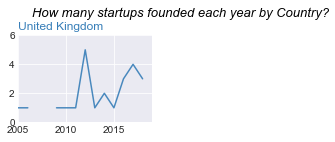

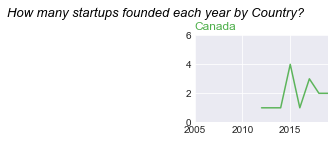

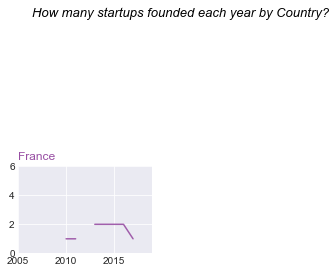

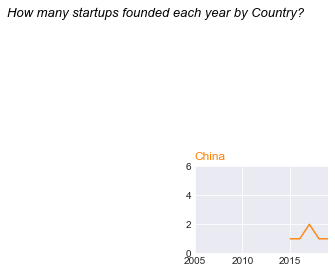

In [53]:
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in noUS_df.drop('Year', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,2, num)
    plt.subplots_adjust(wspace=.5, hspace=.5)

 
    # Plot the lineplot
    plt.plot(noUS_df['Year'], noUS_df[column], marker='', color=palette(num), alpha=0.9, label=column)
 
    # Same limits for everybody!
    plt.xlim(2005,2019)
    plt.ylim(0,6)

 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
    # general title
    plt.suptitle("How many startups founded each year by Country?", fontsize=13, fontweight=0, color='black', style='italic')

    plt.show()

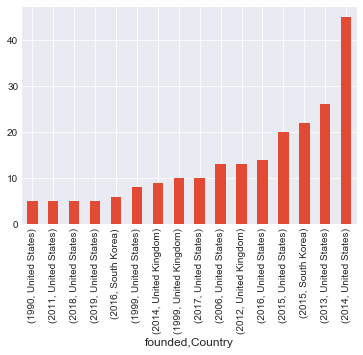

In [54]:
merged_df_fig = merged_df.groupby('Country').filter(lambda x: x.shape[0] > 15)
merged_df_fig.groupby('founded')['Country'].value_counts().sort_values(ascending=True).plot.bar()

### Boxplot of year founded by country <a class="anchor" id="boxplot"></a>

/Users/isa.adls/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Countries w. most startups by Year Founded')

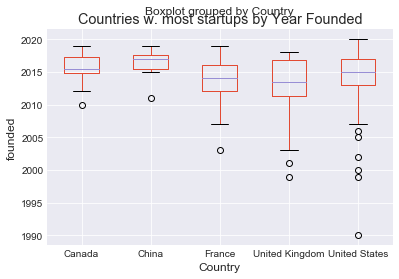

In [55]:
ais_dfig = ais_dfig[['Country', 'founded']]
ais_dfig.boxplot(by='Country', column='founded')
plt.ylabel('founded')
plt.title('Countries w. most startups by Year Founded')

Text(0, 0.5, 'Year startup was founded')

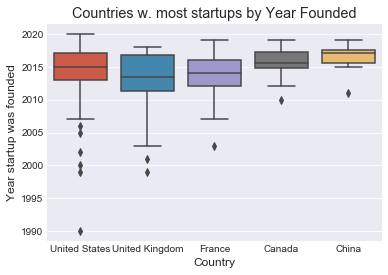

In [56]:
sns.boxplot(x='Country', y='founded', data=ais_dfig)
plt.title('Countries w. most startups by Year Founded')
plt.ylabel('Year startup was founded')

### Look into Therapeutic Areas <a class="anchor" id="ta"></a>

In [57]:
merged_df.groupby('Country')['therapeutic_area'].value_counts()

Country         therapeutic_area           
Australia       Infectious disease              1
Canada          Metabolic disease               2
                Ophthalmology                   1
China           Undisclosed                     5
                Oncology                        1
Denmark         Infectious disease              4
                Oncology                        3
France          Infectious disease              5
                Neurology                       4
                Dermatology                     3
                Oncology                        1
India           Oncology                        6
                Infectious disease              2
                Cardiology                      1
South Korea     Oncology                       15
                Metabolic disease               5
                Neurology                       5
                Fibrosis                        1
                Infectious disease              1
      

In [62]:
Oncology = merged_df['therapeutic_area']=='Oncology'
df_o = merged_df[Oncology]
Neurology = merged_df['therapeutic_area']=='Neurology'
df_n = merged_df[Neurology]
Infectious = merged_df['therapeutic_area']=='Infectious disease'
df_i = merged_df[Infectious]


In [63]:
df_o.Country.value_counts()

United States     68
South Korea       15
United Kingdom    13
India              6
Denmark            3
Spain              1
China              1
France             1
Name: Country, dtype: int64

In [64]:
ta_df = pd.DataFrame({'Oncology':df_o.founded.value_counts(),'Neurology': df_n.founded.value_counts(), 'Infectious disease': df_i.founded.value_counts()})


In [65]:
#add Year as index
ta_df = pd.DataFrame({'Year':ta_df.index, 'Oncology':df_o.founded.value_counts(),'Neurology': df_n.founded.value_counts(), 'Infectious disease': df_i.founded.value_counts()})
ta_df

,Year,Oncology,Neurology,Infectious disease
1990,1990,5.0,NaN,NaN
1999,1999,10.0,7.0,1.0
2002,2002,NaN,NaN,1.0
2006,2006,8.0,5.0,NaN
2007,2007,NaN,4.0,NaN
2008,2008,3.0,NaN,4.0
2009,2009,1.0,1.0,NaN
2011,2011,1.0,NaN,2.0
2012,2012,5.0,2.0,NaN
2013,2013,10.0,5.0,1.0


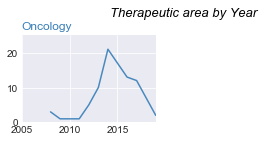

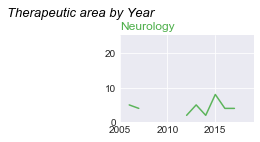

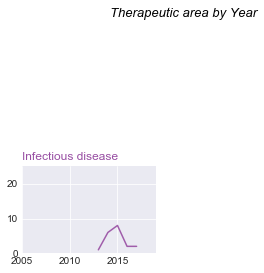

In [66]:
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot
num=0
for column in ta_df.drop('Year', axis=1):
    num+=1
 
    # Find the right spot on the plot
    plt.subplot(2,2, num)
    plt.subplots_adjust(wspace=.5, hspace=.5)

    # Plot the lineplot
    plt.plot(ta_df['Year'], ta_df[column], marker='', color=palette(num), alpha=0.9, label=column)
 
    # Same limits for everybody
    plt.xlim(2005,2019)
    plt.ylim(0,25)

 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num) )
 
    # general title
    plt.suptitle("Therapeutic area by Year", fontsize=13, fontweight=0, color='black', style='italic')
 
    plt.show()

In [67]:
ta_country_ = pd.DataFrame({'Oncology':df_o.Country.value_counts(),'Neurology': df_n.Country.value_counts(), 'Infectious disease': df_i.Country.value_counts()})
ta_country_


,Oncology,Neurology,Infectious disease
Australia,NaN,NaN,1.0
China,1.0,NaN,NaN
Denmark,3.0,NaN,4.0
France,1.0,4.0,5.0
India,6.0,NaN,2.0
South Korea,15.0,5.0,1.0
Spain,1.0,1.0,NaN
United Kingdom,13.0,3.0,1.0
United States,68.0,29.0,13.0


In [68]:
#Add country as index
ta_country_ = pd.DataFrame({'Country':ta_country_.index,'Oncology':df_o.Country.value_counts(),'Neurology': df_n.Country.value_counts(), 'Infectious disease': df_i.Country.value_counts()})
ta_country_

,Country,Oncology,Neurology,Infectious disease
Australia,Australia,NaN,NaN,1.0
China,China,1.0,NaN,NaN
Denmark,Denmark,3.0,NaN,4.0
France,France,1.0,4.0,5.0
India,India,6.0,NaN,2.0
South Korea,South Korea,15.0,5.0,1.0
Spain,Spain,1.0,1.0,NaN
United Kingdom,United Kingdom,13.0,3.0,1.0
United States,United States,68.0,29.0,13.0


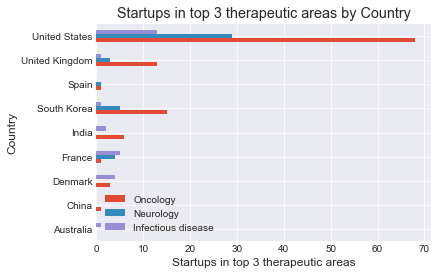

In [69]:
ta_country_.plot.barh()
plt.title('Startups in top 3 therapeutic areas by Country')
plt.xlabel('Startups in top 3 therapeutic areas')
plt.ylabel('Country')
plt.show()

### Word Cloud <a class="anchor" id="wc"></a>
- show common words used in purpose statements

In [70]:
from wordcloud import WordCloud

In [71]:
wc = WordCloud(background_color="white", max_words=2000, width=800, height=400,  collocations=False)
# generate word cloud
wc.generate(' '.join(ais_df['purpose']))

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

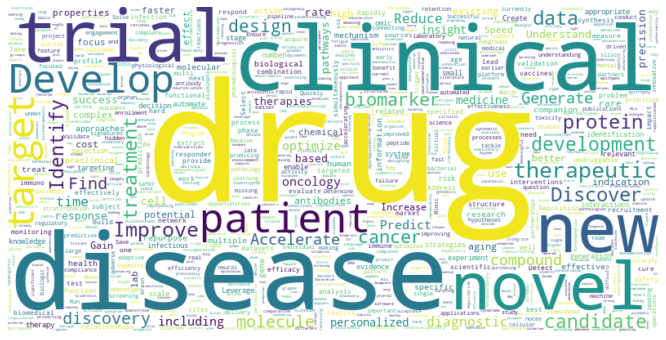

In [73]:
# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()